# Flight Fare Prediction

# Import Libraries



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()


# Load dataset
Data source: https://www.kaggle.com/nikhilmittal/flight-fare-prediction-mh


In [2]:
train_df=pd.read_excel(r'D:\DATA SETS\flight prediction\Data_Train.xlsx')


In [3]:
pd.set_option('display.max_columns',None)

In [4]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
train_df.shape

(10683, 11)

# Exploratory Data Analysis

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


There are 10 object dtype column and 1 int64 dtype column-

In [7]:
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

As we can see there is only 2 missing values


In [8]:
train_df['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
42h 45m      1
31h 30m      1
35h 20m      1
4h 10m       1
33h 20m      1
Name: Duration, Length: 368, dtype: int64

Droping the rows with missing values-

In [9]:
train_df.dropna(inplace=True)

In [10]:
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64



Date_of_Journey is a object data type.Therefore, we have to convert this datatype into timestamp so as to use this column 

properly for prediction.


In [11]:
train_df['Journey_day']=pd.to_datetime(train_df.Date_of_Journey,format='%d/%m/%Y').dt.day
train_df['Journey_month']=pd.to_datetime(train_df.Date_of_Journey,format='%d/%m/%Y').dt.month

In [12]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [13]:
train_df.columns  #All the Columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_day', 'Journey_month'],
      dtype='object')

In [14]:
# Dropping 'Date_of_Journey' Column from the DataFrame.
train_df.drop(["Date_of_Journey"], axis=1,inplace=True)


In [15]:
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Minutes
train_df['Dep_min']=pd.to_datetime(train_df.Dep_Time).dt.minute

# Extracting Hours
train_df['Dep_hour']=pd.to_datetime(train_df.Dep_Time).dt.hour

In [16]:
train_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_min,Dep_hour
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,20,22
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,50,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,25,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,5,18
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,50,16


In [17]:
# Dropping 'Dep_Time' Column from the DataFrame.
train_df.drop(["Dep_Time"], axis=1,inplace=True)


In [18]:
train_df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_min,Dep_hour
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,20,22
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,50,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,25,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,5,18
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,50,16


In [19]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
train_df['Arrival_hour']=pd.to_datetime(train_df.Arrival_Time).dt.hour

# Extracting Minutes
train_df['Arrival_min']=pd.to_datetime(train_df.Arrival_Time).dt.minute

In [20]:
train_df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_min,Dep_hour,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,20,22,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,50,5,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,25,9,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,5,18,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,50,16,21,35


In [21]:
# Dropping 'Arrival_Time' Column from the DataFrame.
train_df.drop(["Arrival_Time"], axis=1,inplace=True)

In [22]:
train_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_min,Dep_hour,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,20,22,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,50,5,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,25,9,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,5,18,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,50,16,21,35


In [23]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list

duration=list(train_df['Duration'])

In [24]:
duration=list(train_df['Duration'])

for i in range(len(duration)):
    if len(duration[i].split())!=2:
        if 'h' in duration[i]:
            duration[i]=duration[i].strip() +' 0m'
        else:
             duration[i]= '0h '  + duration[i]  
                
duration_hours=[]
duration_mins=[]
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep='h')[0]))
    duration_mins.append(int(duration[i].split(sep='m')[0].split()[-1]))
                
        
        

In [25]:
# Adding duration_hours and duration_mins list to train_data dataframe

train_df['Duration_mins']=duration_mins
train_df['Duration_hours']=duration_hours

In [26]:
train_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_min,Dep_hour,Arrival_hour,Arrival_min,Duration_mins,Duration_hours
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,20,22,1,10,50,2
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,50,5,13,15,25,7
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,25,9,4,25,0,19
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,5,18,23,30,25,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,50,16,21,35,45,4


In [27]:
# Dropping 'Duration' Column from the DataFrame.
train_df.drop(['Duration'],axis=1,inplace=True)

In [28]:
train_df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_min,Dep_hour,Arrival_hour,Arrival_min,Duration_mins,Duration_hours
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,20,22,1,10,50,2
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,50,5,13,15,25,7
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,25,9,4,25,0,19
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,5,18,23,30,25,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,50,16,21,35,45,4


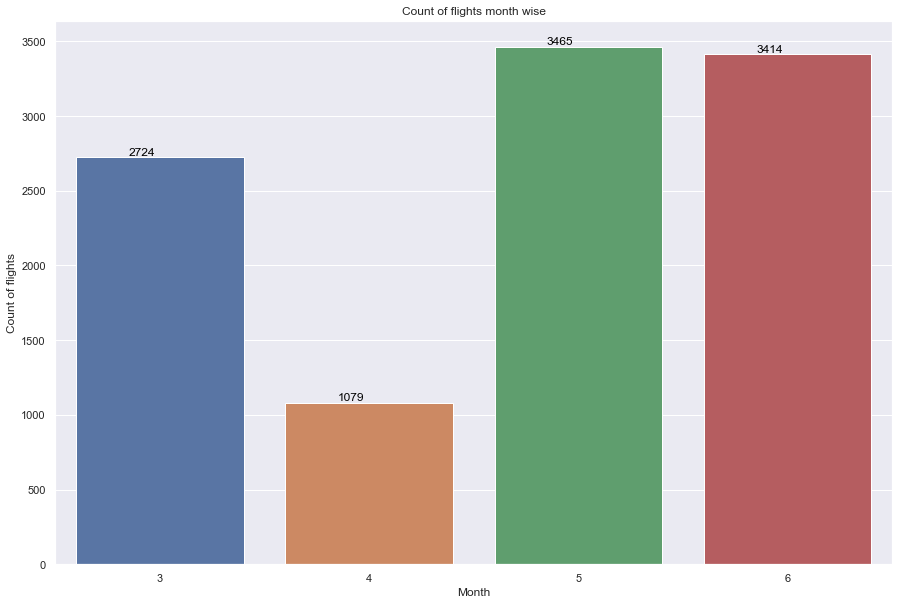

In [29]:
plt.figure(figsize = (15, 10))
plt.title('Count of flights month wise')
ax=sns.countplot(x = 'Journey_month', data = train_df)
plt.xlabel('Month')
plt.ylabel('Count of flights')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

In [30]:
train_df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

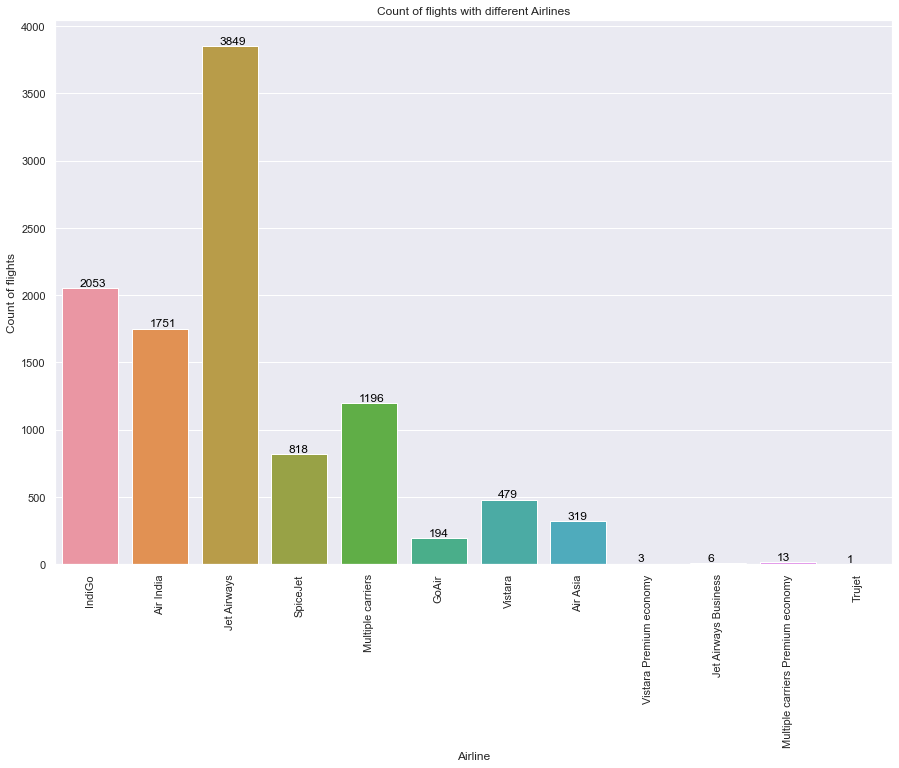

In [31]:
plt.figure(figsize = (15, 10))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'Airline', data =train_df)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

There are more number of flights of Jet Airways.

Jet Airways Business, Vistara Premium economy, Trujet have actually almost negligible flights.



([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text major ticklabel objects>)

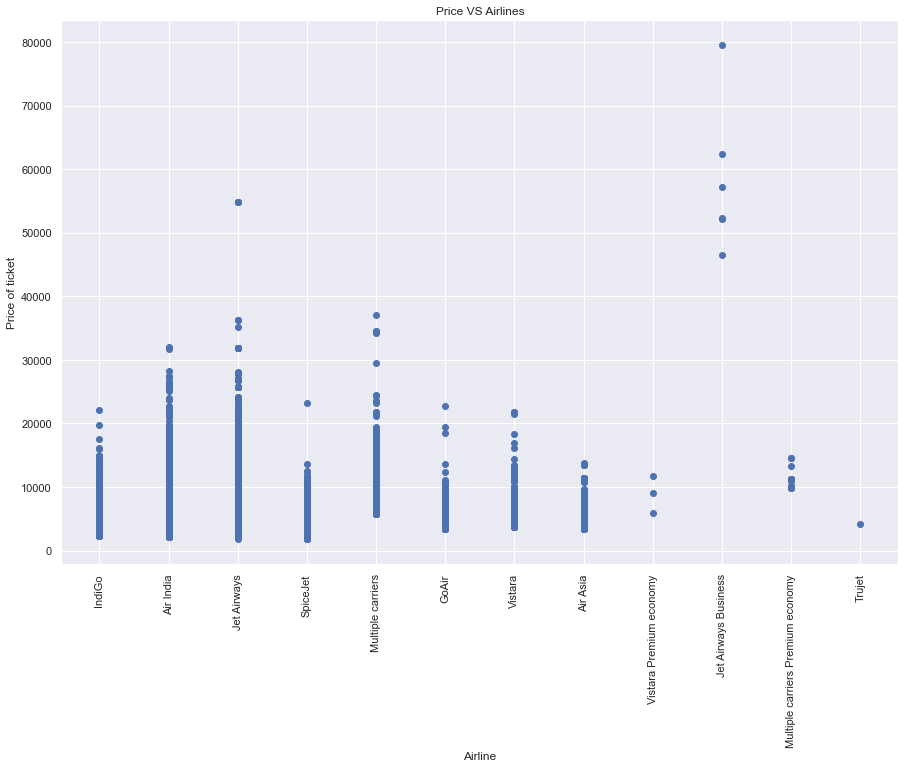

In [32]:
plt.figure(figsize = (15, 10))
plt.title('Price VS Airlines')
plt.scatter(train_df['Airline'], train_df['Price'])
plt.xticks(rotation = 90)
plt.xlabel('Airline')
plt.ylabel('Price of ticket')
plt.xticks(rotation = 90)

The ticket rate for Jet Airways Business airline is high.

Text(0, 0.5, 'Price of ticket')

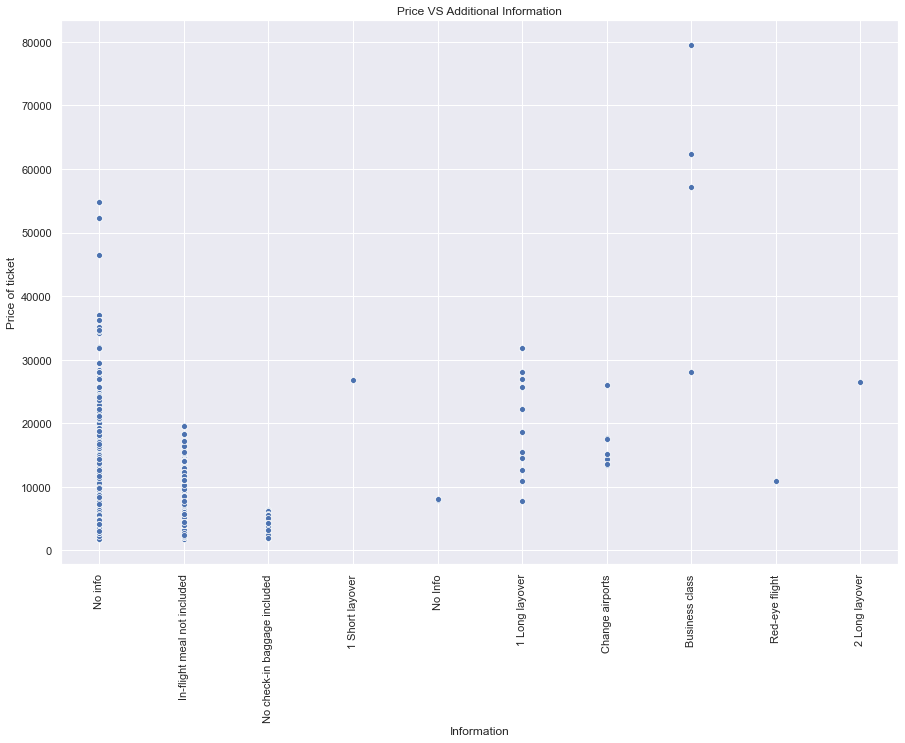

In [33]:
plt.figure(figsize = (15, 10))
plt.title('Price VS Additional Information')
sns.scatterplot(train_df['Additional_Info'], train_df['Price'],data=train_df)
plt.xticks(rotation = 90)
plt.xlabel('Information')
plt.ylabel('Price of ticket')


From above scatter plot it is clear that the ticket prices for Business class is higher which is quite obivious.

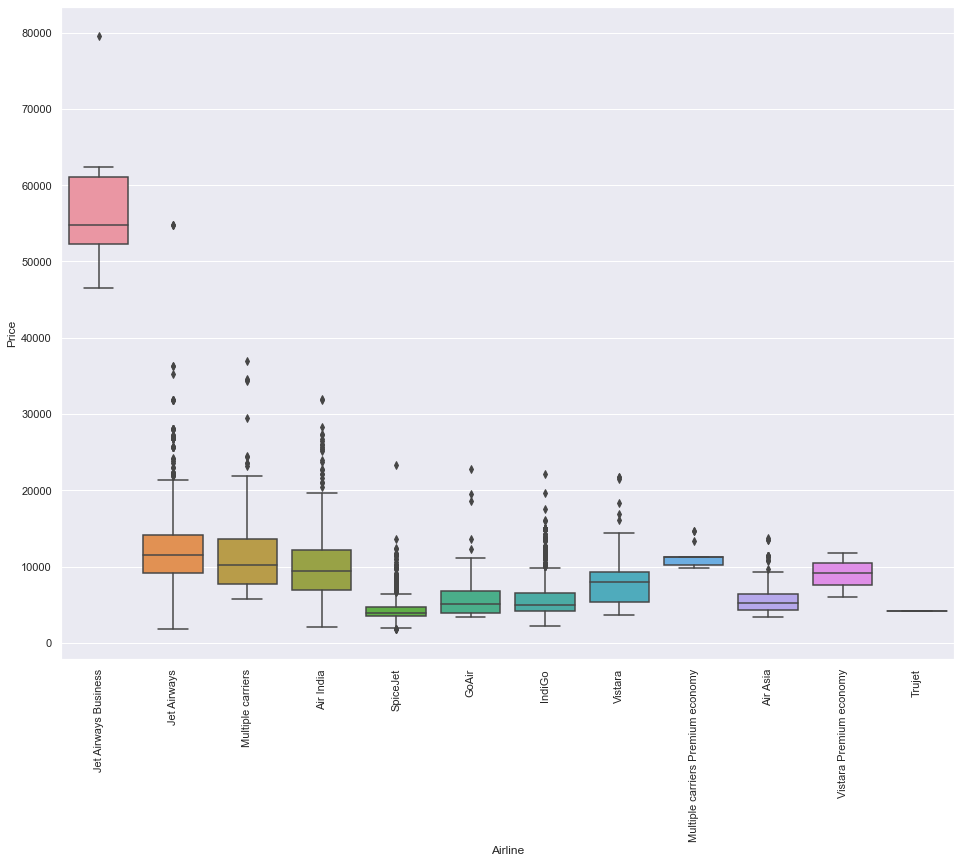

In [34]:
# From graph we can see that Jet Airways Business have the highest Price.
# Apart from the first Airline almost all are having similar median

# Airline vs Price
plt.figure(figsize=(16,12))
sns.boxplot(x='Airline',y='Price',data=train_df.sort_values('Price',ascending=False))
plt.xticks(rotation = 90)
plt.show()


# 4.Feature Engineering

#     Handling Categorical Data

In [35]:
Airline=train_df[['Airline']]
Airline

,Airline
0,IndiGo
1,Air India
2,Jet Airways
3,IndiGo
4,IndiGo
...,...
10678,Air Asia
10679,Air India
10680,Jet Airways
10681,Vistara


In [36]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding
Airline=pd.get_dummies(Airline,drop_first=True)

In [37]:
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [38]:
train_df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

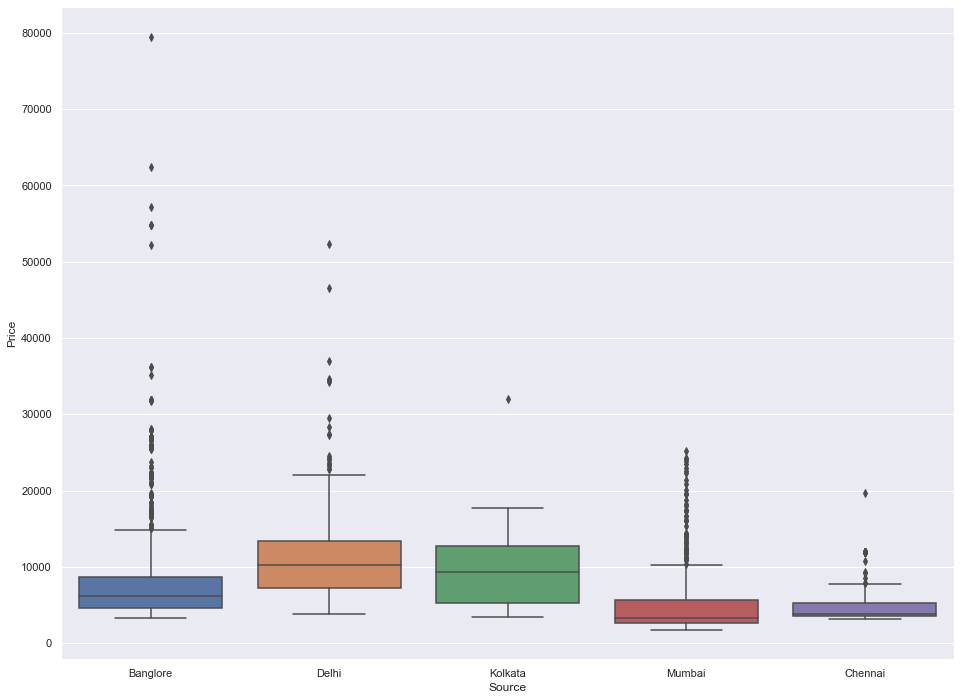

In [39]:
# Source vs Price
plt.figure(figsize=(16,12))
sns.boxplot(x='Source',y='Price',data=train_df.sort_values('Price',ascending=False))
plt.show()


In [40]:
# As Source is Nominal Categorical data we will perform OneHotEncoding
Source=train_df[['Source']]
Source=pd.get_dummies(Source,drop_first=True)

In [41]:
Source

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0
...,...,...,...,...
10678,0,0,1,0
10679,0,0,1,0
10680,0,0,0,0
10681,0,0,0,0


In [42]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding
Destination=train_df[['Destination']]
Destination=pd.get_dummies(Destination,drop_first=True)

In [43]:
Destination

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1
...,...,...,...,...,...
10678,0,0,0,0,0
10679,0,0,0,0,0
10680,0,1,0,0,0
10681,0,0,0,0,1


In [44]:
train_df['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [45]:
(train_df['Additional_Info'].value_counts()/10683)*100

No info                         78.105401
In-flight meal not included     18.552841
No check-in baggage included     2.995413
1 Long layover                   0.177853
Change airports                  0.065525
Business class                   0.037443
No Info                          0.028082
Red-eye flight                   0.009361
1 Short layover                  0.009361
2 Long layover                   0.009361
Name: Additional_Info, dtype: float64

In [46]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
train_df.drop(['Additional_Info','Route'],inplace=True,axis=1)

In [47]:
train_df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_min,Dep_hour,Arrival_hour,Arrival_min,Duration_mins,Duration_hours
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,20,22,1,10,50,2
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,50,5,13,15,25,7
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,25,9,4,25,0,19
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,5,18,23,30,25,5
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,50,16,21,35,45,4


In [48]:
train_df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [49]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

train_df.replace({'1 stop':1, "non-stop":0,"2 stops":2,"3 stops":3, "4 stops":4},inplace=True)

In [50]:
train_df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_min,Dep_hour,Arrival_hour,Arrival_min,Duration_mins,Duration_hours
0,IndiGo,Banglore,New Delhi,0,3897,24,3,20,22,1,10,50,2
1,Air India,Kolkata,Banglore,2,7662,1,5,50,5,13,15,25,7
2,Jet Airways,Delhi,Cochin,2,13882,9,6,25,9,4,25,0,19
3,IndiGo,Kolkata,Banglore,1,6218,12,5,5,18,23,30,25,5
4,IndiGo,Banglore,New Delhi,1,13302,1,3,50,16,21,35,45,4


In [51]:
# Concatenate dataframe --> train_data + Airline + Source + Destination

data_train=pd.concat([train_df,Airline,Source,Destination],axis=1)

In [52]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_min,Dep_hour,Arrival_hour,Arrival_min,Duration_mins,Duration_hours,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,20,22,1,10,50,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,50,5,13,15,25,7,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,25,9,4,25,0,19,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,5,18,23,30,25,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,50,16,21,35,45,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [53]:
data_train.shape

(10682, 33)

In [54]:
data_train.drop(['Airline','Source','Destination'],inplace=True,axis=1)

In [55]:
data_train.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_min,Dep_hour,Arrival_hour,Arrival_min,Duration_mins,Duration_hours,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,20,22,1,10,50,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,50,5,13,15,25,7,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,25,9,4,25,0,19,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,5,18,23,30,25,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,50,16,21,35,45,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [56]:
data_train.shape

(10682, 30)

In [57]:
#data_train.to_csv('flightclean.csv', index=False) 

# Test Set

In [58]:
test_data=pd.read_excel(r'D:\DATA SETS\flight prediction\Test_set.xlsx')


In [59]:
print("Test data Info")
print("-"*75)
print(test_data.info())

print()
print()

print("Null values :")
print("-"*75)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

# EDA

# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_mins"] = duration_mins
test_data["Duration_hours"] = duration_hours

test_data.drop(["Duration"], axis = 1, inplace = True)


# Categorical data

print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data[["Airline"]], drop_first= True)

print()

print("Source")
print("-"*75)
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data[["Source"]], drop_first= True)

print()

print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data[["Destination"]], drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)
data_test.insert(17,'Airline_Trujet',0) #To make the total no. of feature same in Test set

print()
print()

print("Shape of test data : ", data_test.shape)

Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time         

In [60]:
data_test.head()


,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_mins,Duration_hours,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,55,10,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,0,4,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,45,23,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,0,13,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,50,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [61]:
data_train.head()


,Total_Stops,Price,Journey_day,Journey_month,Dep_min,Dep_hour,Arrival_hour,Arrival_min,Duration_mins,Duration_hours,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,20,22,1,10,50,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,50,5,13,15,25,7,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,25,9,4,25,0,19,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,5,18,23,30,25,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,50,16,21,35,45,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [62]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_min',
       'Dep_hour', 'Arrival_hour', 'Arrival_min', 'Duration_mins',
       'Duration_hours', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [63]:
X=data_train.drop('Price',axis=1)

In [64]:
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_min,Dep_hour,Arrival_hour,Arrival_min,Duration_mins,Duration_hours,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,20,22,1,10,50,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,50,5,13,15,25,7,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,25,9,4,25,0,19,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,5,18,23,30,25,5,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,50,16,21,35,45,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [65]:
X.shape


(10682, 29)

In [66]:
y=data_train.Price

In [67]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

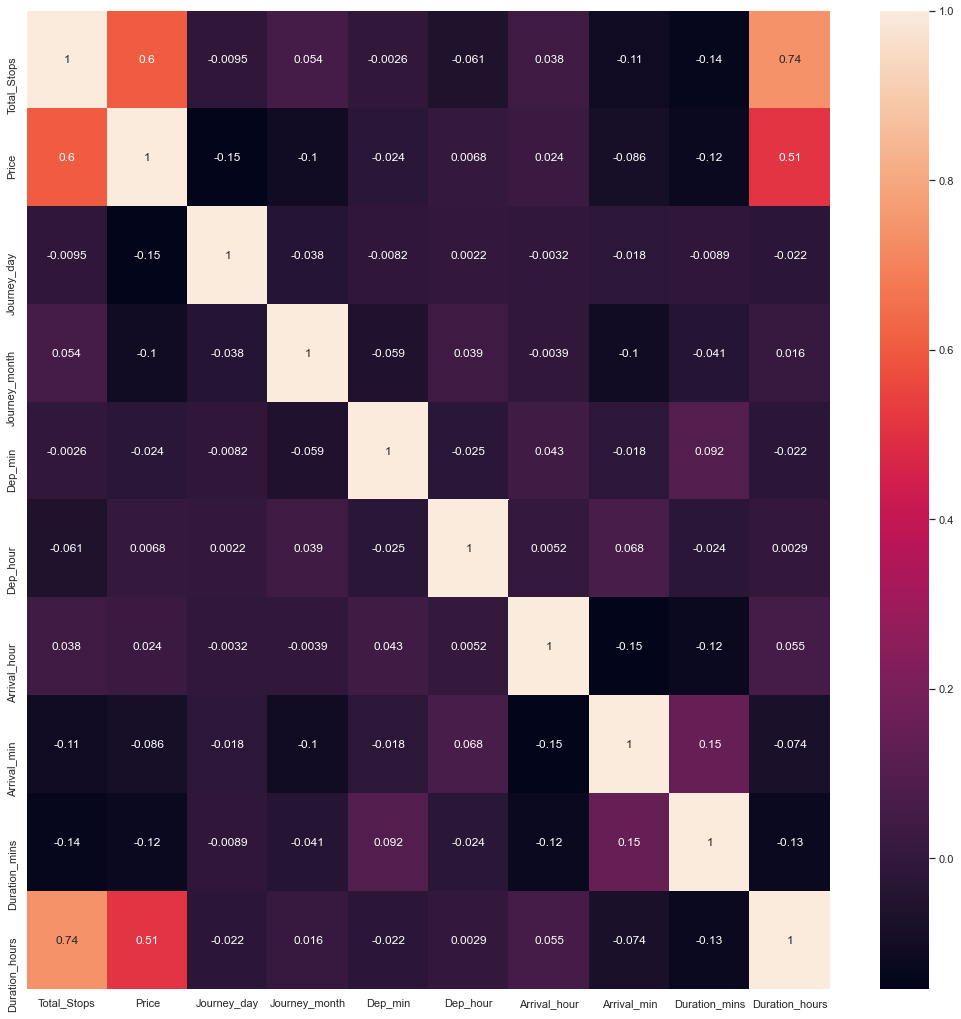

In [68]:
# Finds correlation between Independent and dependent attributes
plt.figure(figsize=(18,18))
sns.heatmap(train_df.corr(),annot=True)

# Machine Learning Model Training

In [69]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

from math import sqrt

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import KFold

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Split Dataset in train and test

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [78]:
print("The size of training input is", X_train.shape)
print("The size of training output is", y_train.shape)
print(100*'*')
print("The size of testing input is", X_test.shape)
print("The size of testing output is", y_test.shape)

The size of training input is (8545, 29)
The size of training output is (8545,)
****************************************************************************************************
The size of testing input is (2137, 29)
The size of testing output is (2137,)


# Ridge Regression

In [79]:
params ={'alpha' :[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
ridge_regressor =GridSearchCV(Ridge(), params ,cv =5,scoring = 'neg_mean_absolute_error', n_jobs =-1)
ridge_regressor.fit(X_train ,y_train)


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             scoring='neg_mean_absolute_error')

In [80]:
y_train_pred =ridge_regressor.predict(X_train) ##Predict train result
y_test_pred =ridge_regressor.predict(X_test) ##Predict test result

In [81]:
print("Train Results for Ridge Regressor Model:")
print(100* '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Ridge Regressor Model:
----------------------------------------------------------------------------------------------------
Root mean squared error:  2822.418333320217
Mean absolute % error:  24
R-squared:  0.6240579311908494


In [82]:
print("Test Results for Ridge Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for Ridge Regressor Model:
--------------------------------------------------
Root mean squared error:  2863.843335994609
Mean absolute % error:  24
R-squared:  0.6196281778593506


# Lasso Regression


In [83]:
params ={'alpha' :[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
lasso_regressor =GridSearchCV(Lasso(), params ,cv =15,scoring = 'neg_mean_absolute_error', n_jobs =-1)
lasso_regressor.fit(X_train ,y_train)

GridSearchCV(cv=15, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             scoring='neg_mean_absolute_error')

In [84]:
y_train_pred =lasso_regressor.predict(X_train) ##Predict train result
y_test_pred =lasso_regressor.predict(X_test) ##Predict test result

In [85]:
print("Train Results for Lasso Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))


Train Results for Lasso Regressor Model:
--------------------------------------------------
Root mean squared error:  2823.3365206425055
Mean absolute % error:  24
R-squared:  0.6238132889383947


In [86]:
print("Test Results for Lasso Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for Lasso Regressor Model:
--------------------------------------------------
Root mean squared error:  2866.031252377319
Mean absolute % error:  24
R-squared:  0.6190467636243491


# K Neighbors Regressor

In [87]:
k_range = list(range(1, 30))
params = dict(n_neighbors = k_range)
knn_regressor = GridSearchCV(KNeighborsRegressor(), params, cv =10, scoring = 'neg_mean_squared_error')
knn_regressor.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29]},
             scoring='neg_mean_squared_error')

In [88]:
y_train_pred =knn_regressor.predict(X_train) ##Predict train result
y_test_pred =knn_regressor.predict(X_test) ##Predict test result

In [89]:
print("Train Results for KNN Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for KNN Regressor Model:
--------------------------------------------------
Root mean squared error:  2025.3098809710034
Mean absolute % error:  13
R-squared:  0.8064197166862431


In [90]:
print("Test Results for KNN Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean absolute % errorr: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for KNN Regressor Model:
--------------------------------------------------
Root mean squared error:  3107.9264349575406
Mean absolute % errorr:  21
R-squared:  0.5520275719582425


# Decision Tree Regressor

In [91]:
depth  =list(range(3,30))
param_grid =dict(max_depth =depth)
tree =GridSearchCV(DecisionTreeRegressor(),param_grid,cv =10)
tree.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                       25, 26, 27, 28, 29]})

In [92]:
y_train_pred =tree.predict(X_train) ##Predict train result
y_test_pred =tree.predict(X_test) ##Predict test result


In [93]:
print("Train Results for Decision Tree Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Decision Tree Regressor Model:
--------------------------------------------------
Root mean squared error:  1592.3866620057242
Mean absolute % error:  12
R-squared:  0.8803327748932661


In [94]:
print("Test Results for Decision Tree Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for Decision Tree Regressor Model:
--------------------------------------------------
Root mean squared error:  2122.819604550274
Mean absolute % error:  14
R-squared:  0.7910049484281659


# Random Forest Regressor

In [86]:
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
max_features=["auto", "sqrt"]
max_depth=[int(x) for x in np.linspace(start=5,stop=30,num=6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

# Hyper Parmeter Tuning

In [87]:
random_grid={'n_estimators':n_estimators,
             'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf}

In [88]:
rf_random=RandomizedSearchCV(estimator=RandomForestRegressor(),param_distributions=random_grid,scoring='neg_mean_squared_error',cv=5,n_iter=10,verbose=2,random_state=42, n_jobs = 1)

In [89]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.4s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.1s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   4.8s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.6s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.8s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  4.1min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [223]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [224]:
y_train_pred = rf_random.predict(X_train) #Predict train result
y_test_pred = rf_random.predict(X_test)   #Predict test result

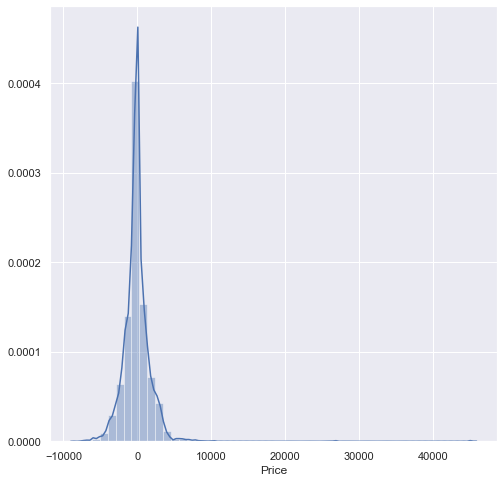

In [225]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-y_test_pred)
plt.show()

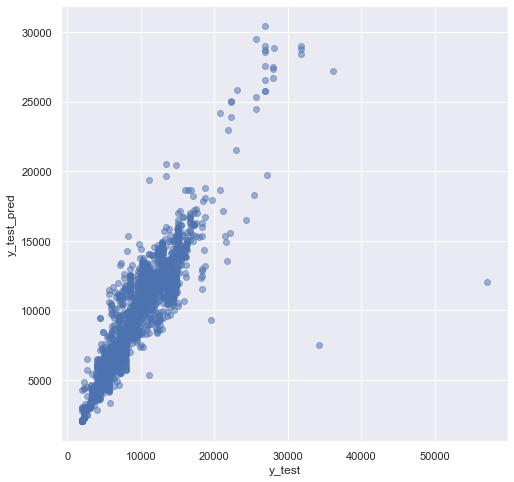

In [226]:
plt.figure(figsize = (8,8))
plt.scatter(y_test,y_test_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_test_pred")
plt.show()

In [229]:
print("Train Results for Decision Tree Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Decision Tree Regressor Model:
--------------------------------------------------
Root mean squared error:  1485.9720812782548
Mean absolute % error:  10.0
R-squared:  0.8957923846255821


In [227]:
print("Test Results for Decision Tree Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for Decision Tree Regressor Model:
--------------------------------------------------
Root mean squared error:  2011.3928208606217
Mean absolute % error:  13.0
R-squared:  0.81236942251764


# XGBOOST REGRESSOR

In [77]:
from xgboost import XGBRegressor

In [80]:
tuned_params = {'max_depth': [1, 2, 3, 4, 5], 'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [100, 200, 300, 400, 500], 'reg_lambda': [0.001, 0.1, 1.0, 10.0, 100.0]}
xgb= RandomizedSearchCV(XGBRegressor(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=1,verbose=2)
xgb.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] reg_lambda=10.0, n_estimators=300, max_depth=4, learning_rate=0.01 
[13:22:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  reg_lambda=10.0, n_estimators=300, max_depth=4, learning_rate=0.01, total=   2.0s
[CV] reg_lambda=10.0, n_estimators=300, max_depth=4, learning_rate=0.01 
[13:22:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


[CV]  reg_lambda=10.0, n_estimators=300, max_depth=4, learning_rate=0.01, total=   2.1s
[CV] reg_lambda=10.0, n_estimators=300, max_depth=4, learning_rate=0.01 
[13:22:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  reg_lambda=10.0, n_estimators=300, max_depth=4, learning_rate=0.01, total=   2.0s
[CV] reg_lambda=10.0, n_estimators=300, max_depth=4, learning_rate=0.01 
[13:22:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  reg_lambda=10.0, n_estimators=300, max_depth=4, learning_rate=0.01, total=   2.0s
[CV] reg_lambda=10.0, n_estimators=300, max_depth=4, learning_rate=0.01 
[13:22:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  reg_lambda=10.0, n_estimators=300, max_depth=4, learning_rate=0.01, total=   1.4s
[CV] reg_lambda=100.0, n_estimators=300, max_depth=3, learning_rate=0.05 
[13:22:

[CV]  reg_lambda=1.0, n_estimators=100, max_depth=2, learning_rate=0.1, total=   0.3s
[CV] reg_lambda=1.0, n_estimators=100, max_depth=2, learning_rate=0.1 
[13:22:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  reg_lambda=1.0, n_estimators=100, max_depth=2, learning_rate=0.1, total=   0.2s
[CV] reg_lambda=1.0, n_estimators=100, max_depth=2, learning_rate=0.1 
[13:22:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  reg_lambda=1.0, n_estimators=100, max_depth=2, learning_rate=0.1, total=   0.2s
[CV] reg_lambda=1.0, n_estimators=100, max_depth=2, learning_rate=0.1 
[13:22:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  reg_lambda=1.0, n_estimators=100, max_depth=2, learning_rate=0.1, total=   0.3s
[CV] reg_lambda=100.0, n_estimators=200, max_depth=5, learning_rate=0.05 
[13:22:46] WARNING: s

[CV]  reg_lambda=0.1, n_estimators=300, max_depth=5, learning_rate=0.05, total=   1.4s
[CV] reg_lambda=0.1, n_estimators=300, max_depth=5, learning_rate=0.05 
[13:23:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  reg_lambda=0.1, n_estimators=300, max_depth=5, learning_rate=0.05, total=   1.4s
[CV] reg_lambda=0.1, n_estimators=300, max_depth=5, learning_rate=0.05 
[13:23:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  reg_lambda=0.1, n_estimators=300, max_depth=5, learning_rate=0.05, total=   1.5s
[CV] reg_lambda=0.1, n_estimators=300, max_depth=5, learning_rate=0.05 
[13:23:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  reg_lambda=0.1, n_estimators=300, max_depth=5, learning_rate=0.05, total=   1.5s
[CV] reg_lambda=1.0, n_estimators=400, max_depth=2, learning_rate=0.1 
[13:23:10] WARNIN

[CV]  reg_lambda=100.0, n_estimators=500, max_depth=4, learning_rate=0.1, total=   1.9s
[CV] reg_lambda=100.0, n_estimators=500, max_depth=4, learning_rate=0.1 
[13:23:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  reg_lambda=100.0, n_estimators=500, max_depth=4, learning_rate=0.1, total=   2.0s
[CV] reg_lambda=100.0, n_estimators=500, max_depth=4, learning_rate=0.1 
[13:23:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  reg_lambda=100.0, n_estimators=500, max_depth=4, learning_rate=0.1, total=   1.9s
[CV] reg_lambda=100.0, n_estimators=500, max_depth=4, learning_rate=0.1 
[13:23:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  reg_lambda=100.0, n_estimators=500, max_depth=4, learning_rate=0.1, total=   1.9s
[CV] reg_lambda=10.0, n_estimators=400, max_depth=2, learning_rate=0.01 
[13:23:3

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.6min finished


RandomizedSearchCV(cv=5, estimator=XGBRegressor(), n_iter=20, n_jobs=1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [1, 2, 3, 4, 5],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'reg_lambda': [0.001, 0.1, 1.0, 10.0,
                                                       100.0]},
                   scoring='neg_mean_absolute_error', verbose=2)

In [81]:
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)


In [82]:
print("Train Results for XGBoost Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for XGBoost Regressor Model:
--------------------------------------------------
Root mean squared error:  1540.92175416468
Mean absolute % error:  13
R-squared:  0.8879429123766671


In [83]:
print("Test Results for XGBoost Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Test Results for XGBoost Regressor Model:
--------------------------------------------------
Root mean squared error:  1816.5474150578082
Mean absolute % error:  14
R-squared:  0.8469605838356197


# Save the model to reuse it again

In [84]:
import pickle

# Saving RandomForest Model

In [90]:
file=open('flight_rf.pkl','wb')
pickle.dump(rf_random,file)

# Saving Xgboost Model

In [102]:
file=open('flight_xgb.pkl','wb')
pickle.dump(xgb,file)

# Loading RandomForest Model and Predicting

In [95]:
model1=open('flight_rf.pkl','rb')
finalmodel_rf=pickle.load(model1)


In [96]:
y_predicted=finalmodel_rf.predict(X_test)

In [97]:
r2_score(y_test, y_predicted)

0.8118900793769652

# Accuracy we got by using RandomForest Model is 81%

# Loading Xgboost Model and Predicting

In [103]:
model2=open('flight_xgb.pkl','rb')
finalmodel_xgb=pickle.load(model2)


[13:37:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [107]:
y_predicted=finalmodel_xgb.predict(X_test)

In [108]:
r2_score(y_test, y_predicted)

0.8469605838356197

# Accuracy we got by using Xgboost Model is 84%

# Among all the models used we Got the Highest Accuracy by using Xgboost Regressor